## Import Dependencies

In [1]:
import atoti
import pandas as pd

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


## Instantiate Atoti Server and UI

In [2]:
# Start an Atoti Server instance
session = atoti.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
    # app_extensions=tt.ADVANCED_APP_EXTENSION,
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Inspect Data Quality Using Pandas

In [3]:
# Load CSV data into Pandas DataFrame
loans_df = pd.read_csv("data/loans.csv")
loans_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Describe data for several metrics, format to the thousandths
loans_df.describe().map(lambda x: f"{x:0.3f}")

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000
mean,0.805,0.123,319.089,10.932,12.607,710.846,4560.767,16913.964,46.799,1.577,0.164,0.062,0.160
std,0.396,0.027,207.071,0.615,6.884,37.971,2496.930,33756.190,29.014,2.200,0.546,0.262,0.367
min,0.000,0.060,15.670,7.548,0.000,612.000,178.958,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.104,163.770,10.558,7.213,682.000,2820.000,3187.000,22.600,0.000,0.000,0.000,0.000
50%,1.000,0.122,268.950,10.929,12.665,707.000,4139.958,8596.000,46.300,1.000,0.000,0.000,0.000
75%,1.000,0.141,432.762,11.291,17.950,737.000,5730.000,18249.500,70.900,2.000,0.000,0.000,0.000
max,1.000,0.216,940.140,14.528,29.960,827.000,17639.958,1207359.000,119.000,33.000,13.000,5.000,1.000


In [5]:
# Check for nulls/incomplete data
loans_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Load Pandas DataFrame Into Atoti Cube

In [6]:
loans_table = session.read_pandas(loans_df, table_name="loans")
cube = session.create_cube(loans_table)

## Cube Analysis

In [7]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [8]:
# View hierarchies for the cube
h

{('loans', 'purpose'): <atoti.hierarchy.Hierarchy object at 0x146d2a770>}

In [9]:
# View levels for the cube
l

In [10]:
# View measures for the cube
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x146d2b640>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x146d9a410>, 'installment.SUM': <atoti.measure.Measure object at 0x146d9a440>, 'installment.MEAN': <atoti.measure.Measure object at 0x146d9a470>, 'credit.policy.SUM': <atoti.measure.Measure object at 0x146d9a4a0>, 'credit.policy.MEAN': <atoti.measure.Measure object at 0x146d9a4d0>, 'delinq.2yrs.SUM': <atoti.measure.Measure object at 0x146d9a500>, 'delinq.2yrs.MEAN': <atoti.measure.Measure object at 0x146d9a530>, 'fico.SUM': <atoti.measure.Measure object at 0x146d9a560>, 'fico.MEAN': <atoti.measure.Measure object at 0x146d9a590>, 'inq.last.6mths.SUM': <atoti.measure.Measure object at 0x146d9a5c0>, 'inq.last.6mths.MEAN': <atoti.measure.Measure object at 0x146d9a5f0>, 'revol.bal.SUM': <atoti.measure.Measure object at 0x146d9a620>, 'revol.bal.MEAN': <atoti.measure.Measure object at 0x146d9a650>, 'dti.SUM': <atoti.measure.Measure object at 0x146d9a680>, 'dti.MEAN': <atoti.measure.Measure object at 0x146d9a6b0>, 'pub.rec.SUM': <atoti.measure.Measure object at 0x146d9a6e0>, 'pub.rec.MEAN': <atoti.measure.Measure object at 0x146d9a710>, 'int.rate.SUM': <atoti.measure.Measure object at 0x146d9a740>, 'int.rate.MEAN': <atoti.measure.Measure object at 0x146d9a770>, 'revol.util.SUM': <atoti.measure.Measure object at 0x146d9a7a0>, 'revol.util.MEAN': <atoti.measure.Measure object at 0x146d9a7d0>, 'log.annual.inc.SUM': <atoti.measure.Measure object at 0x146d9a800>, 'log.annual.inc.MEAN': <atoti.measure.Measure object at 0x146d9a830>, 'days.with.cr.line.SUM': <atoti.measure.Measure object at 0x146d9a860>, 'days.with.cr.line.MEAN': <atoti.measure.Measure object at 0x146d9a890>, 'not.fully.paid.SUM': <atoti.measure.Measure object at 0x146d9a8c0>, 'not.fully.paid.MEAN': <atoti.measure.Measure object at 0x146d9a8f0>}

## Feature Engineering in Atoti

In [11]:
m["percentage not paid"] = m["not.fully.paid.SUM"] / m["contributors.COUNT"]
m["percentage paid"] = 1 - m["percentage not paid"]

In [12]:
cube.query(
    m["percentage not paid"],
    levels=[l["purpose"]],
    include_totals=True
)

,percentage not paid
purpose,
Total,.16
all_other,.17
credit_card,.12
debt_consolidation,.15
educational,.20
home_improvement,.17
major_purchase,.11
small_business,.28


## Data Analysis and Visualization in Atoti

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
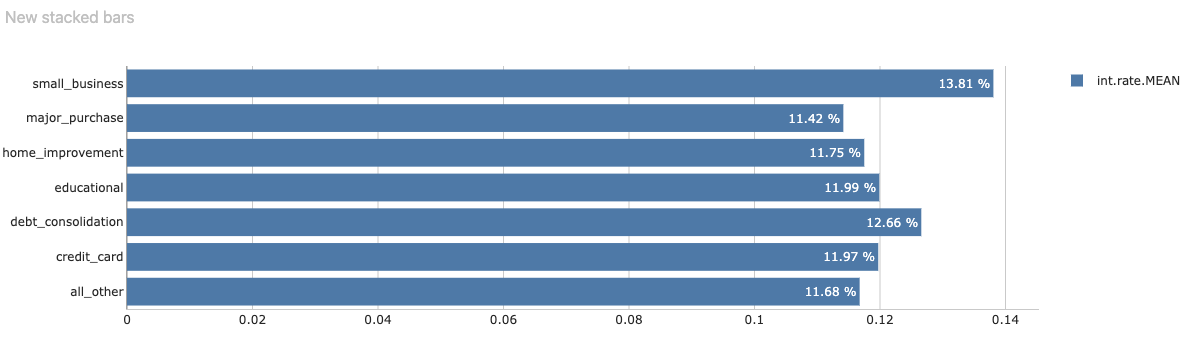

In [13]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
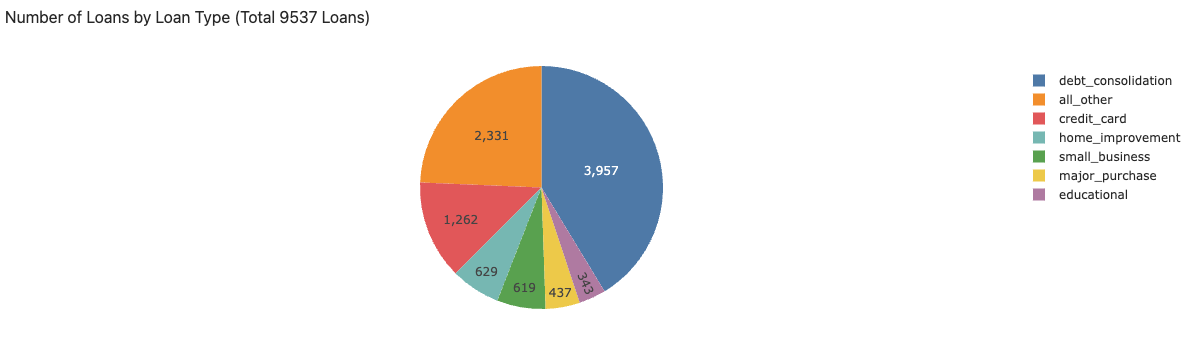

In [14]:
# Sliced by purpose for contributors.COUNT values
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
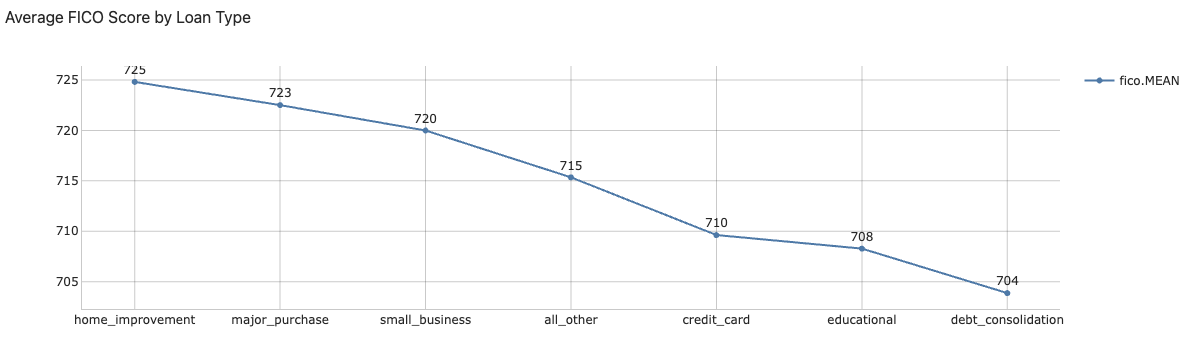

In [15]:
# X-axis purpose, y-axis fico.MEAN
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
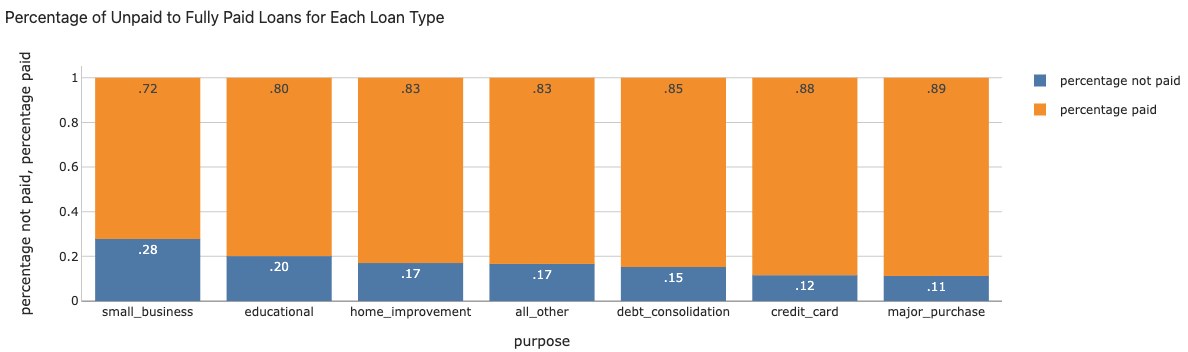

In [16]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
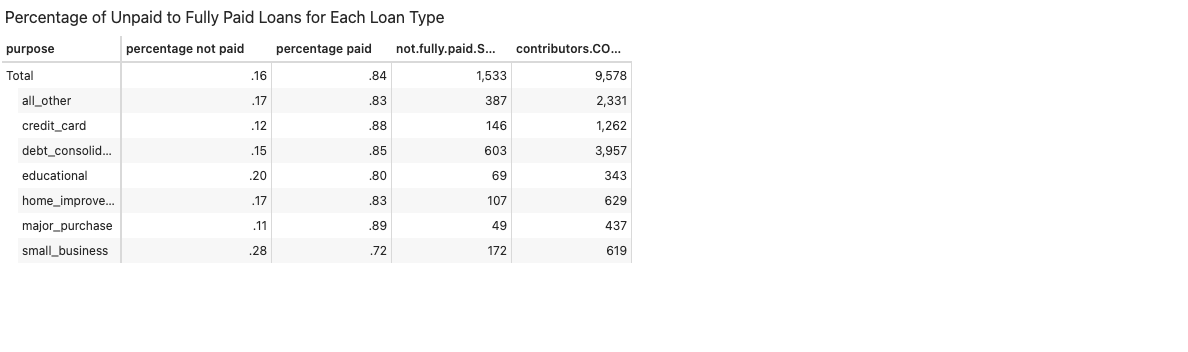

In [17]:
session.widget